# **NBA Career Prediction**
**Predict 5-Year Career Longevity for NBA Rookies**

## WEEK 3 - Exploratory Data Analysis

In this project, we are trying to classify a rookie player will last at least 5 years in the NBA or not. 

The labels are included in the train data and the goal is to train a model to learn to predict the labels from the features
Classification: The label is a binary variable, 0 (if career years played < 5), 1 (if career years played >= 5)

This is one of the three notebook. In this notebook, we will explore and visualize data and prepare dataset for modeling.The main purpose of this notebook is to understand the data, try and identify relationships, trends, or anomalies that may help our modeling.


**The steps are:**
1. Read Data
2. Exploratory data analysis
3. Data visualization

## 1. Read data

##### **[1.1]** Import all modules needed

In [1]:
# Essentials for for data manipulation
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.preprocessing import StandardScaler
from joblib import dump
from sklearn.model_selection import train_test_split
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE


# Other
import warnings
warnings.filterwarnings(action="ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)
# pd.options.display.max_seq_items = 8000
#pd.options.display.max_rows = 200

# sklearn preprocessing for dealing with categorical variables
# from sklearn.preprocessing import LabelEncoder

Please download train.csv and test.csv into data/raw folder then read data in notebook.

##### **[1.2]** Training data features

In [2]:
df_train = pd.read_csv("../data/raw/train.csv")
print('Training data shape: ', df_train.shape)
df_train.head()

Training data shape:  (8000, 21)


,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,10556,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,5342,75,21.8,10.5,4.2,7.9,55.1,-0.3,-1.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,5716,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,13790,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,5470,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1


**Note:** The training data has 8,000 observations (each one a player) and 21 features (variables) including TARGET_5Yrs (the label we want to predict).

##### **[1.3]** Testing data features

In [3]:
df_test = pd.read_csv("../data/raw/test.csv")
print('Testing data shape: ', df_test.shape)
df_test.head()

Testing data shape:  (3799, 20)


,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,1,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,8194,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,-0.0,1.8
2,3,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,8196,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,8197,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,-0.4,0.9


**Note:** The test set is considerably smaller, has 3,799 observations and lacks a TARGET_5Yrs column.

## 2. Exploratory Data Analysis

##### **[2.1]** Examine the distribution of target variable

1    0.833625
0    0.166375
Name: TARGET_5Yrs, dtype: float64

<AxesSubplot:ylabel='Frequency'>

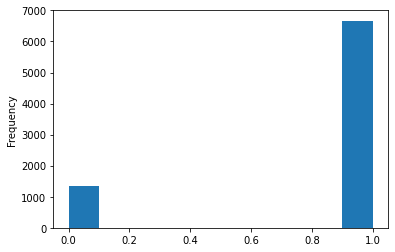

In [4]:
df_train['TARGET_5Yrs'].value_counts()/len(df_train)
df_train['TARGET_5Yrs'].astype(int).plot.hist()

**Note**: Target variable is imbalanced. There are far more players that were played more or equal to 5 years than career years played less than 5 years. We can weight the classes by their representation in the data to reflect this imbalance. For example, we should consider SMOTE, Oversampling or other methods...


##### **[2.2]** Examine duplicate

In [5]:
len(df_train['Id'].unique())
df_train[df_train.duplicated(keep=False)]

len(df_test['Id'].unique())
df_test[df_test.duplicated(keep=False)]

8000

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs


3799

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV


There are no duplicate in our trainset and testset

##### **[2.2]** Examine missing values

In [6]:
# Function to calculate missing values by column 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Missing values statistics
print("Train set")
missing_values = missing_values_table(df_train)
missing_values.head(20)

print()

print("Test set")
missing_values = missing_values_table(df_test)
missing_values.head(20)

Train set
Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values



Test set
Your selected dataframe has 20 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


There are no missing value in our train set and test set.

In [8]:
# check train columns and test columns
one_value_cols_train = [col for col in df_train.columns if df_train[col].nunique() <= 1]
one_value_cols_test = [col for col in df_test.columns if df_test[col].nunique() <= 1]
one_value_cols_train == one_value_cols_test

True

the columns are unique.


##### **[2.3]** Column types

In [9]:
# Display summary of train
# total values in each column, null/not null, datatype, memory occupied etc
print("Number of each type of column in train")
df_train.dtypes.value_counts()
df_train.info()

print()

print("Number of each type of column in test")
df_test.dtypes.value_counts()
df_test.info()

Number of each type of column in train


float64    18
int64       3
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           8000 non-null   int64  
 1   GP           8000 non-null   int64  
 2   MIN          8000 non-null   float64
 3   PTS          8000 non-null   float64
 4   FGM          8000 non-null   float64
 5   FGA          8000 non-null   float64
 6   FG%          8000 non-null   float64
 7   3P Made      8000 non-null   float64
 8   3PA          8000 non-null   float64
 9   3P%          8000 non-null   float64
 10  FTM          8000 non-null   float64
 11  FTA          8000 non-null   float64
 12  FT%          8000 non-null   float64
 13  OREB         8000 non-null   float64
 14  DREB         8000 non-null   float64
 15  REB          8000 non-null   float64
 16  AST          8000 non-null   float64
 17  STL          8000 non-null   float64
 18  BLK          8000 non-null   float64
 19  TOV   

float64    18
int64       2
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       3799 non-null   int64  
 1   GP       3799 non-null   int64  
 2   MIN      3799 non-null   float64
 3   PTS      3799 non-null   float64
 4   FGM      3799 non-null   float64
 5   FGA      3799 non-null   float64
 6   FG%      3799 non-null   float64
 7   3P Made  3799 non-null   float64
 8   3PA      3799 non-null   float64
 9   3P%      3799 non-null   float64
 10  FTM      3799 non-null   float64
 11  FTA      3799 non-null   float64
 12  FT%      3799 non-null   float64
 13  OREB     3799 non-null   float64
 14  DREB     3799 non-null   float64
 15  REB      3799 non-null   float64
 16  AST      3799 non-null   float64
 17  STL      3799 non-null   float64
 18  BLK      3799 non-null   float64
 19  TOV      3799 non-null   float64
dtypes: float64(18), int64(2)
memory usage: 593.7 KB


**Note:** TARGET_5Yrs is a categorical varaible, which is already be encoding, in Dtype int64.

##### **[2.4]** Display descriptive data of train and test dataframe

In [10]:
df_train.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6856.971000,62.777875,18.576662,7.267088,2.807037,6.231212,44.608900,0.264525,0.816562,19.583700,1.392525,1.947788,71.365825,1.077838,2.168500,3.245300,1.624513,0.648687,0.245212,1.257763,0.833625
std,3977.447579,17.118774,8.935263,4.318732,1.693373,3.584559,6.155453,0.384093,1.060964,16.003155,0.926153,1.252352,10.430447,0.785670,1.392224,2.085154,1.355986,0.407626,0.821037,0.723270,0.372440
min,4.000000,-8.000000,2.900000,0.800000,0.300000,0.800000,21.300000,-1.100000,-3.100000,-38.500000,0.000000,0.000000,-13.300000,0.000000,0.200000,0.300000,0.000000,0.000000,-17.900000,0.100000,0.000000
25%,3413.750000,51.000000,12.000000,4.100000,1.600000,3.600000,40.400000,0.000000,0.100000,8.400000,0.700000,1.000000,65.000000,0.500000,1.100000,1.700000,0.700000,0.300000,0.100000,0.700000,1.000000
50%,6787.500000,63.000000,16.800000,6.300000,2.400000,5.400000,44.400000,0.300000,0.800000,19.500000,1.200000,1.700000,71.400000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000,1.000000
75%,10299.250000,74.000000,23.500000,9.500000,3.700000,8.100000,48.700000,0.500000,1.500000,30.600000,1.900000,2.600000,77.500000,1.500000,2.900000,4.300000,2.200000,0.900000,0.400000,1.600000,1.000000
max,13798.000000,123.000000,73.800000,34.200000,13.100000,28.900000,67.200000,1.700000,4.700000,82.100000,8.100000,11.100000,168.900000,5.500000,11.000000,15.900000,12.800000,3.600000,18.900000,5.300000,1.000000


In [11]:
df_test.describe()

,Id,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
count,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000
mean,7010.614109,62.853909,18.650224,7.328034,2.835404,6.302580,44.599079,0.255962,0.796920,19.234746,1.399842,1.953567,71.612924,1.096025,2.179495,3.275783,1.636483,0.653593,0.257726,1.257910
std,3954.173641,17.151740,8.727259,4.294724,1.688427,3.579221,6.040168,0.380987,1.052862,15.968989,0.926140,1.250376,10.457336,0.785678,1.371935,2.070646,1.335496,0.410573,0.639660,0.712449
min,1.000000,6.000000,3.700000,0.700000,0.300000,0.800000,25.100000,-1.000000,-2.700000,-38.000000,0.000000,0.000000,23.700000,0.000000,0.200000,0.300000,0.000000,0.000000,-7.100000,0.100000
25%,3644.000000,51.000000,12.200000,4.200000,1.600000,3.700000,40.500000,-0.000000,0.100000,8.500000,0.700000,1.000000,65.000000,0.500000,1.200000,1.800000,0.600000,0.400000,0.100000,0.700000
50%,7062.000000,63.000000,17.000000,6.400000,2.500000,5.500000,44.600000,0.300000,0.800000,19.400000,1.200000,1.700000,71.500000,0.900000,1.900000,2.800000,1.300000,0.600000,0.200000,1.100000
75%,10402.500000,74.000000,23.300000,9.400000,3.700000,8.100000,48.500000,0.500000,1.500000,30.250000,1.900000,2.600000,78.000000,1.500000,2.900000,4.300000,2.300000,0.900000,0.400000,1.600000
max,13792.000000,126.000000,68.000000,33.000000,13.400000,26.200000,74.600000,1.600000,4.300000,73.800000,7.800000,9.800000,127.100000,6.900000,12.000000,18.500000,9.000000,2.700000,14.800000,5.200000


**Note:** 
1. There are some columns has anomalies value. For example, MIN has max value in 73.8 in train and 68 in test, which is not likely, given 48mins/game. -> examine number of instances
2. FT% has max value >100 in train and test, not possible -> examine number of instances.
3. Columns containing negative values in both train and test, but these values should not be negative: 
* Train set: GP, 3P Made, 3PA, 3P%, BLK, FT% 
* Test set: 3P Made, 3PA, 3P%, BLK
* Columns containing negative values in Train only: GP, FT%

**Note:** the GP is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1) 

## 3. Data visualization

##### **[3.1]** Correlation between X and y

Correlations
Now that we have dealt with the categorical variables and the outliers.
We can understand the data is by looking for correlations between the features and the target. Calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

* .00-.19 “very weak”
* .20-.39 “weak”
* .40-.59 “moderate”
* .60-.79 “strong”
* .80-1.0 “very strong”

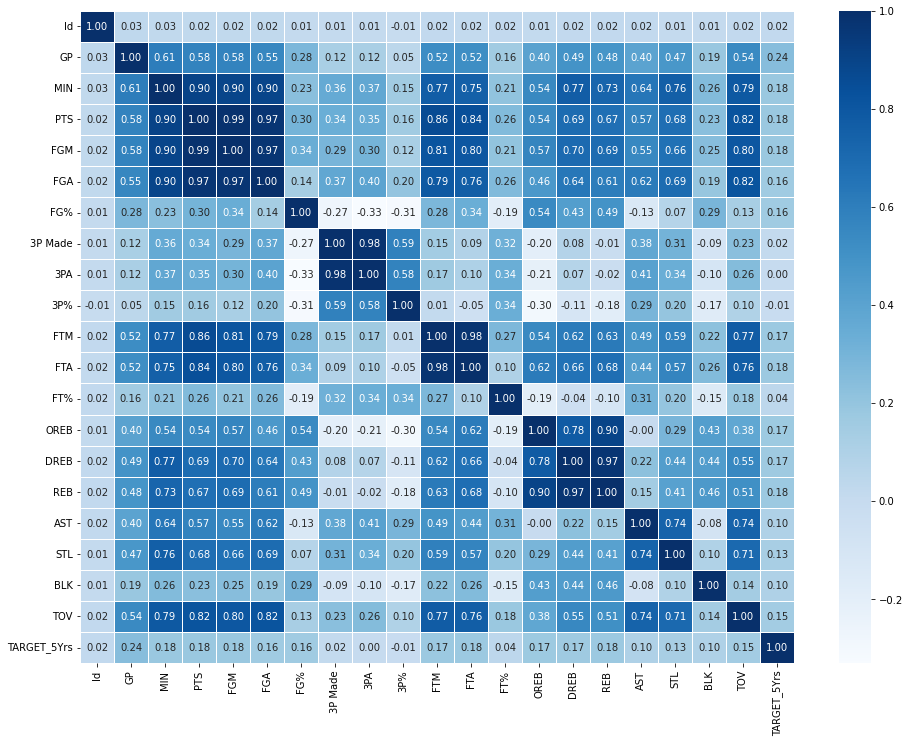

In [12]:
corr_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(16,12))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")

In [13]:
# Find correlations with the Target and sort
correlations = df_train.corr()['TARGET_5Yrs'].sort_values()

# Display correlations with Target
print('Most Positive Correlations with Target:')
correlations.tail(10)

print()

print('Most Negative Correlations with Target:') 
correlations.head(10)

Most Positive Correlations with Target:


DREB           0.168065
OREB           0.172604
FTM            0.173913
REB            0.175627
FTA            0.176525
PTS            0.182004
MIN            0.182203
FGM            0.183568
GP             0.242108
TARGET_5Yrs    1.000000
Name: TARGET_5Yrs, dtype: float64


Most Negative Correlations with Target:


3P%       -0.011977
3PA        0.003463
3P Made    0.015016
Id         0.018233
FT%        0.039429
AST        0.096771
BLK        0.098642
STL        0.128381
TOV        0.151240
FG%        0.158858
Name: TARGET_5Yrs, dtype: float64

**Note:** the GP is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1) 

##### **[3.2]** Distribution of all variables

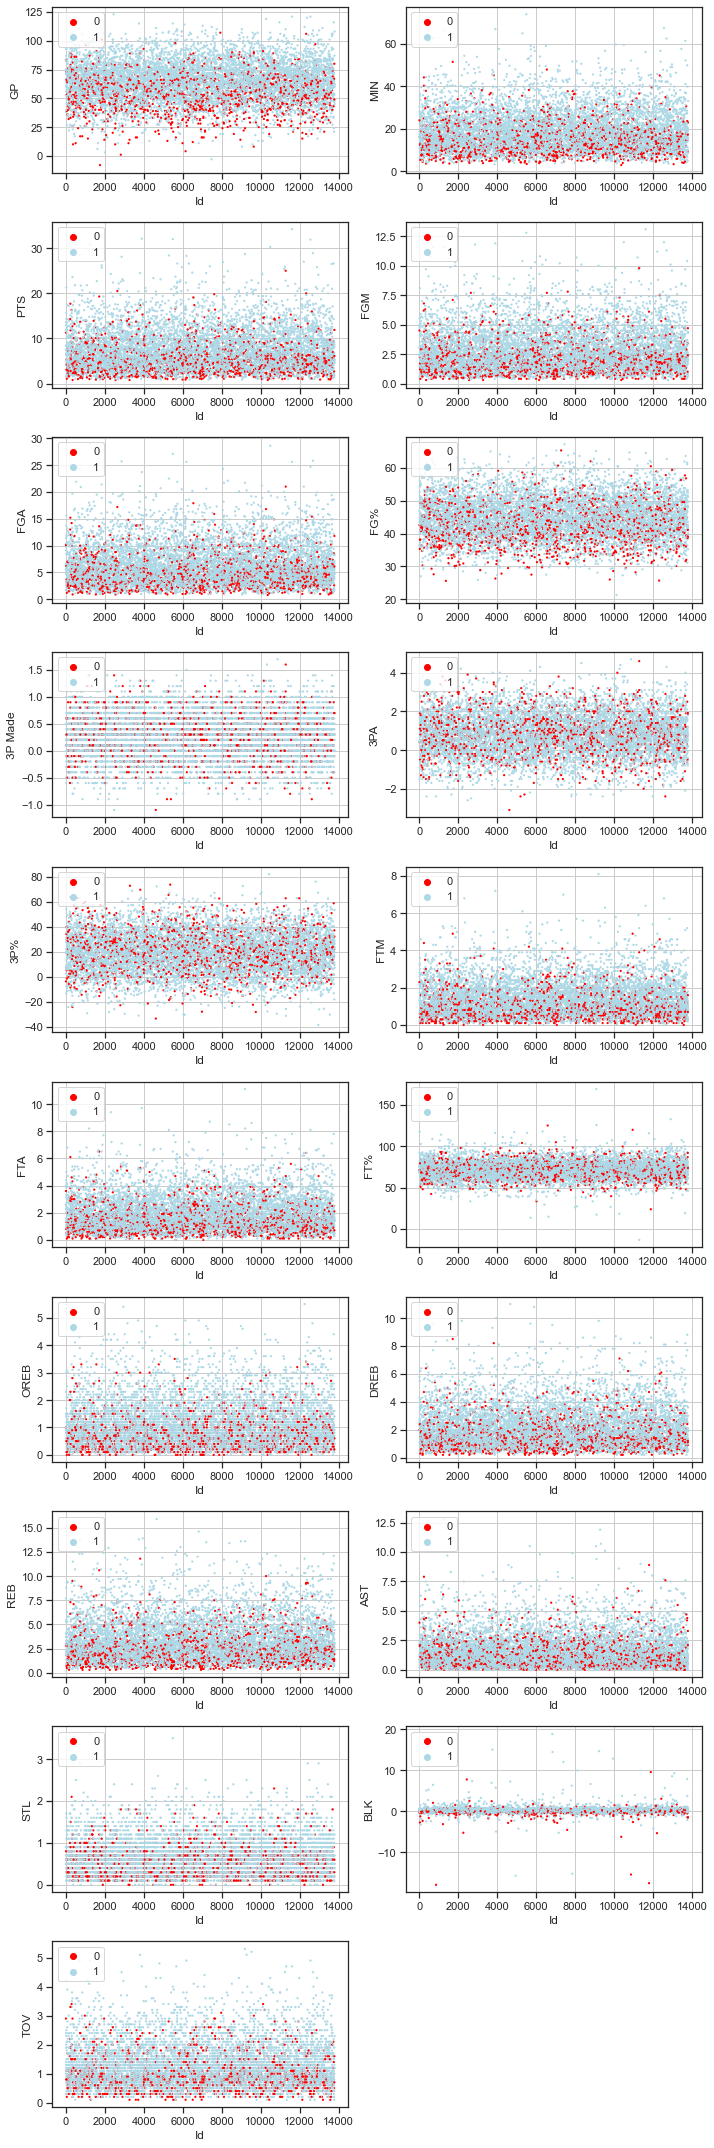

In [14]:
sns.set_theme(style="ticks")
plt.figure(figsize = (10,30))
nrow = 10
ncol = 2
i = 1 
for variable in df_train.drop(columns = ['Id','TARGET_5Yrs']):
    plt.grid()
    plt.subplot(nrow, ncol, i)
    sns.scatterplot(x = "Id", y = variable, hue = "TARGET_5Yrs", data = df_train, 
                    legend = 'full',edgecolor = 'none', s = 5, palette=['red','lightblue']);
    i += 1
    plt.legend(loc=2)
plt.tight_layout()
plt.show();

##### **[3.3]** Violin plot of all variables

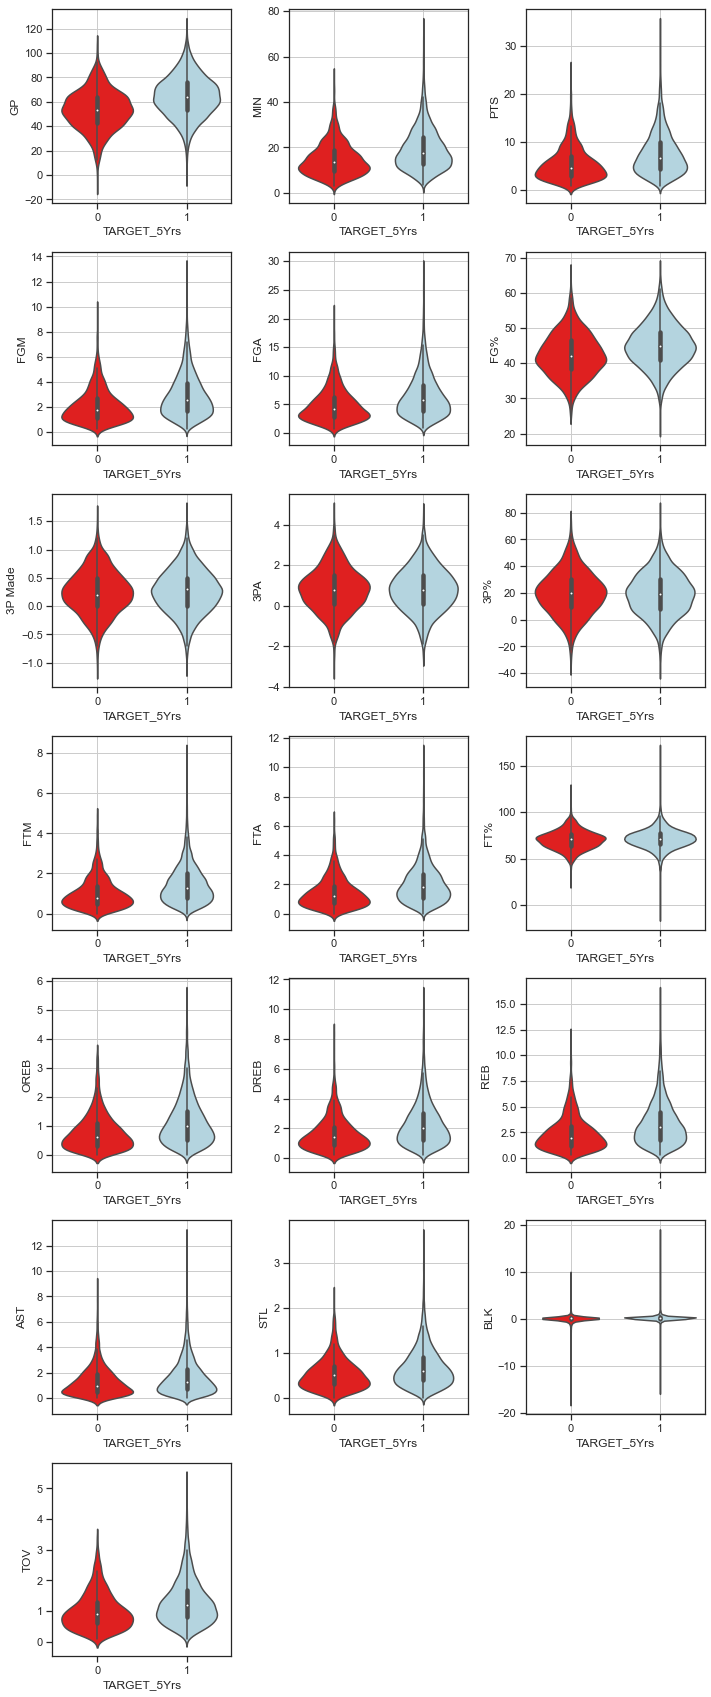

In [15]:
plt.figure(figsize = (10,30))
nrow = 9
ncol = 3
i = 1 
for variable in df_train.drop(columns = ['Id','TARGET_5Yrs']):
    plt.grid()
    plt.subplot(nrow, ncol, i)
    sns.violinplot(x = "TARGET_5Yrs", y = variable, data = df_train, palette=['red','lightblue'])
    #plt.legend()
    i += 1
   # plt.legend(loc=2)
plt.tight_layout()
plt.show();

From the violin plots, we can see almost all the has a higher value of the features when TARGET_5Yrs = 1.
Especially: MIN, FGM, FGA, FTM, FTA, OREB, DREB, REB, AST, STL, BLK, TOV.

##### **[3.4]** Pairplot for all variables

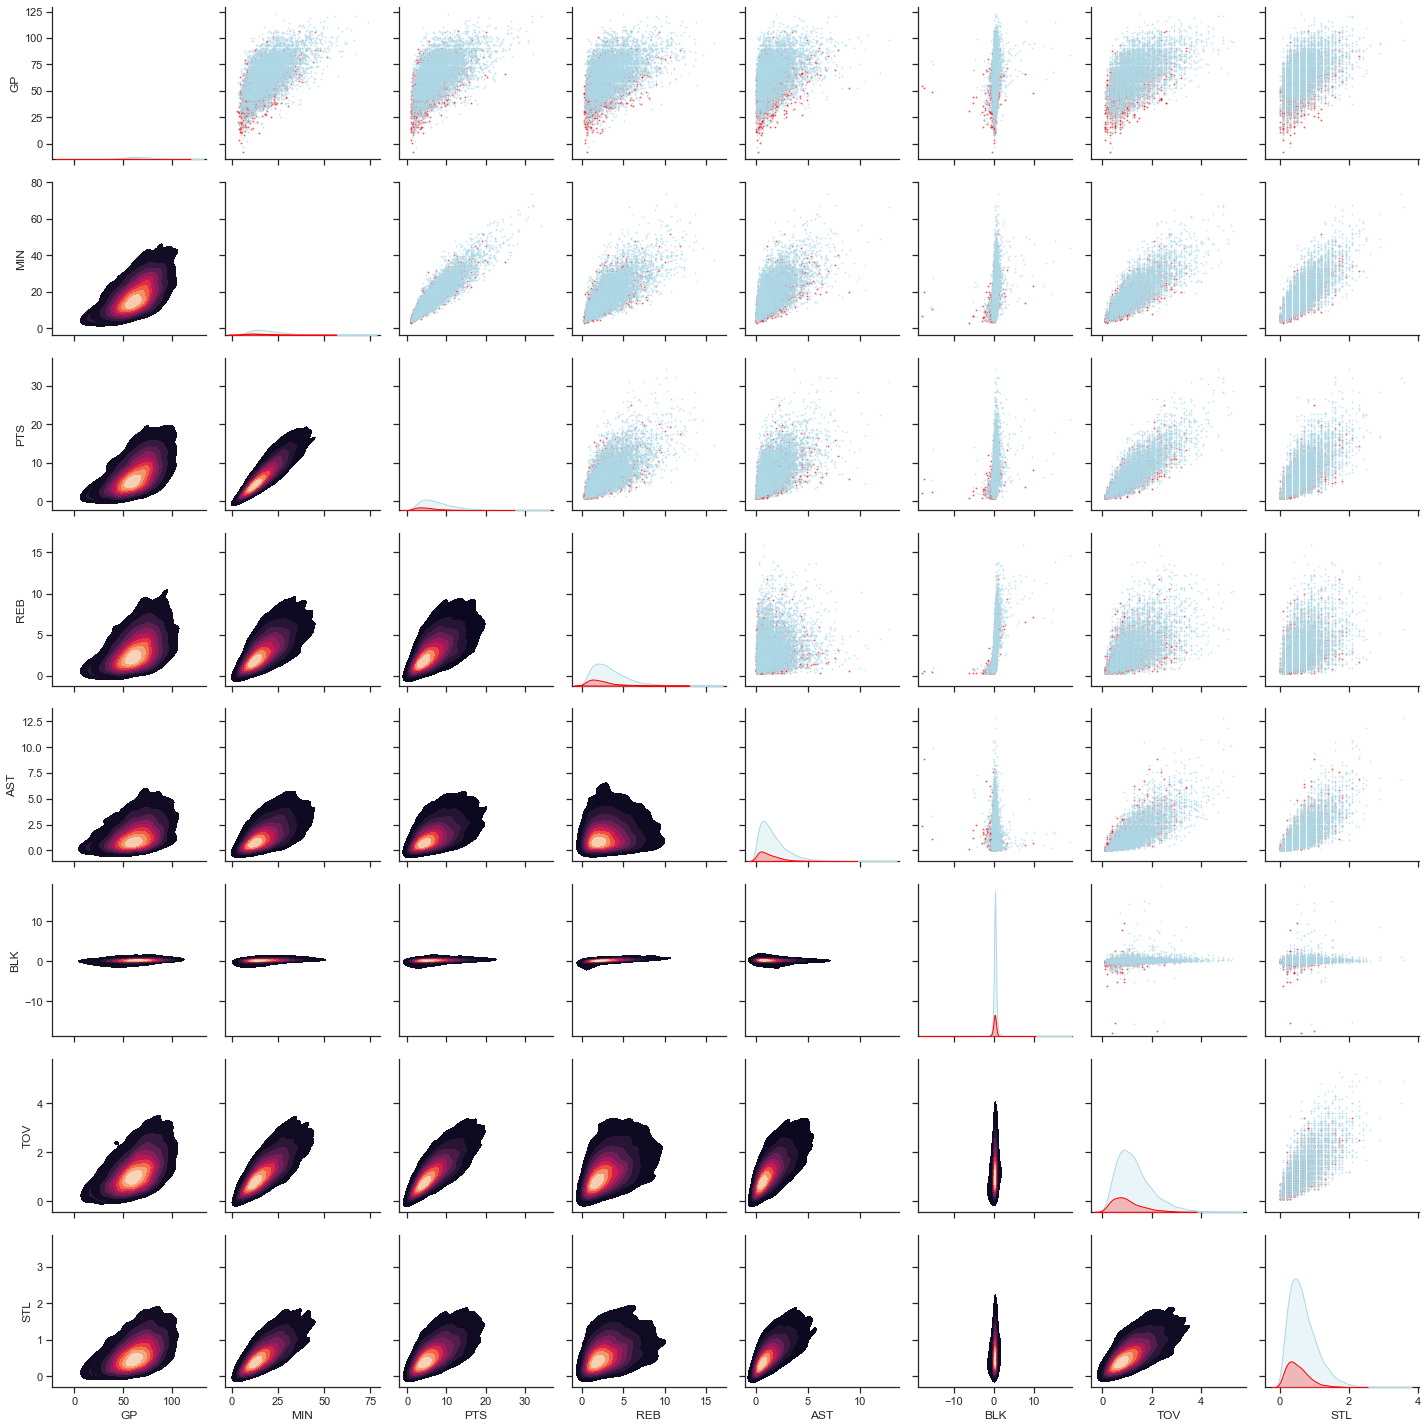

In [16]:
def infer_cmap(color):
    hues = ['red','lightblue']
    if color == hues[0]:
        return 'Reds'
    elif color == hues[1]:
        return 'lightBlues'

def kde_color_plot(x, y, **kwargs):
    cmap = infer_cmap(kwargs['color'])
    ax = sns.kdeplot(x, y, shade=True, shade_lowest=False, cmap=cmap, **kwargs)
    return ax

g = sns.PairGrid(df_train[['GP', 'MIN', 'PTS', 'REB', 'AST', 'BLK', 'TOV', 'STL', 'TARGET_5Yrs']], 
                 vars=('GP', 'MIN', 'PTS', 'REB', 'AST', 'BLK', 'TOV', 'STL'), 
                 hue='TARGET_5Yrs', palette=['red','lightblue'])
g = g.map_upper(plt.scatter, s=1, alpha=0.5)
g = g.map_lower(kde_color_plot)
g = g.map_diag(sns.kdeplot, shade=True);
plt.tight_layout()
plt.show();


In variabel 'GP', 'MIN', 'PTS', 'REB', 'AST', 'BLK', 'TOV', 'STL'. 
From the Pairplots, we can see almost all the features have a positive relationship with the other features. TARGET_5Yrs = 1 is shown in blue, which is slightly higher than red TARGET_5Yrs = 0.

##### **[3.5]** Check the number of anomalies value

In [17]:
# MIN > 48
print("number of anomalies value of MIN > 48 in (train, test):")
len(df_train[df_train["MIN"] > 48].index), len(df_test[df_test["MIN"] > 48].index)

# FT% > 100
print("number of anomalies value in FT > 100 in (train, test):")
len(df_train[df_train["FT%"] > 100].index), len(df_test[df_test["FT%"] > 100].index)

# Find % of all columns containing negative values in train and test
print("% of negative values of each column in train")
(df_train < 0).sum(axis = 0)/df_train.shape[0]

print()

print("% of negative values of each column in test")
(df_test < 0).sum(axis = 0)/df_test.shape[0]


# Further investigate negative values
df_train[df_train["GP"] < 0].index
df_train[df_train["FT%"] < 0].index

name_list = ["3P Made", "3PA", "3P%", "BLK"]
for name in name_list:
    print(f"No. of Negative values in column '{name}' in (train, test): ({len(df_train[df_train[name] < 0].index)}, {len(df_test[df_test[name] < 0].index)})")


number of anomalies value of MIN > 48 in (train, test):


(56, 19)

number of anomalies value in FT > 100 in (train, test):


(58, 30)

% of negative values of each column in train


Id             0.000000
GP             0.000250
MIN            0.000000
PTS            0.000000
FGM            0.000000
FGA            0.000000
FG%            0.000000
3P Made        0.203625
3PA            0.207250
3P%            0.109750
FTM            0.000000
FTA            0.000000
FT%            0.000125
OREB           0.000000
DREB           0.000000
REB            0.000000
AST            0.000000
STL            0.000000
BLK            0.131000
TOV            0.000000
TARGET_5Yrs    0.000000
dtype: float64


% of negative values of each column in test


Id         0.000000
GP         0.000000
MIN        0.000000
PTS        0.000000
FGM        0.000000
FGA        0.000000
FG%        0.000000
3P Made    0.204001
3PA        0.203475
3P%        0.114504
FTM        0.000000
FTA        0.000000
FT%        0.000000
OREB       0.000000
DREB       0.000000
REB        0.000000
AST        0.000000
STL        0.000000
BLK        0.120032
TOV        0.000000
dtype: float64

Int64Index([5323, 7400], dtype='int64')

Int64Index([3059], dtype='int64')

No. of Negative values in column '3P Made' in (train, test): (1629, 775)
No. of Negative values in column '3PA' in (train, test): (1658, 773)
No. of Negative values in column '3P%' in (train, test): (878, 435)
No. of Negative values in column 'BLK' in (train, test): (1048, 456)


**Note:** 

There are a lot of anomalies values in the dataset. Compare substitute all negative values with the mode or median we did in week one and week 2; we will try a more unbiased way to deal with this problem. We will fill values with np.nan and create boolean columns indicating whether or not the values was anomalous. Please check wu_wenying-14007025-week3_Features.ipynb for details.